# Boston Housing Dataset

### Here, we will make use of the regression algorithms to predict the house prices for the city of Boston

#### Information about the data:
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- Target - Median value of owner-occupied homes in $1000's

####  1. Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
boston_housing_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

print("Some values in the dataset:")
print(boston_housing_data.head())

Some values in the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [43]:
print("Main statistics about the dataset:")
print(boston_housing_data.describe())

Main statistics about the dataset:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.67

In [46]:
print(f"Number of rows in the dataset: {boston_housing_data.shape[0]}\nNumber of columns in the dataset: {boston_housing_data.shape[1]}")

Number of rows in the dataset: 506
Number of columns in the dataset: 14


In [57]:
#Check for missing values in the dataset
print("Missing values in the dataset:\n",boston_housing_data.isnull().sum())

Missing values in the dataset:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [60]:
#Check for NA values
print("NA values in the dataset:\n",boston_housing_data.isna().sum())

NA values in the dataset:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


#### I will leave feature scaling for later, since I am planning to use a variety of models, of which some benefit from scaling and some don't.

#### 2. Data Visualization

<AxesSubplot:>

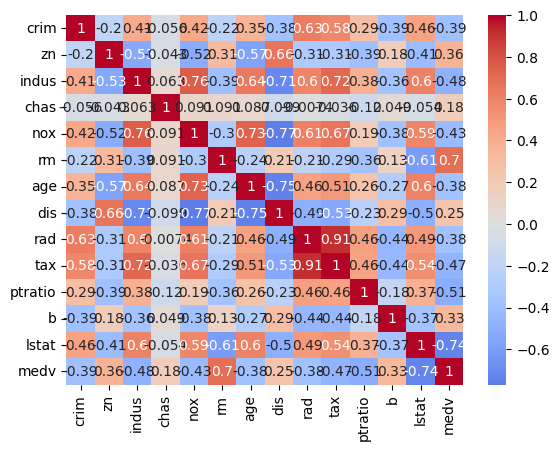

In [47]:
# Correlation heatmap to see the relationships between the features
sns.heatmap(boston_housing_data.corr(), annot=True, cmap="coolwarm", center=0)

#### Some observations from the heatmap

- LSTAT and MEDV are negatively correlated (-0.74) which means that as the percentage of lower status decreases, the median value of housing increases.
- RM and MEDV have a strong correlation, (0.7) which means that median value of housing increases in direct proportion to the average number of rooms per dwelling.
- TAX and RAD are highly correlated (0.91) which might suggest that there is some collinearity there.
- DIS and NOX are negatively correlated (-0.77) which means that the distance to the offices and air pollution are inversely proportional to each other

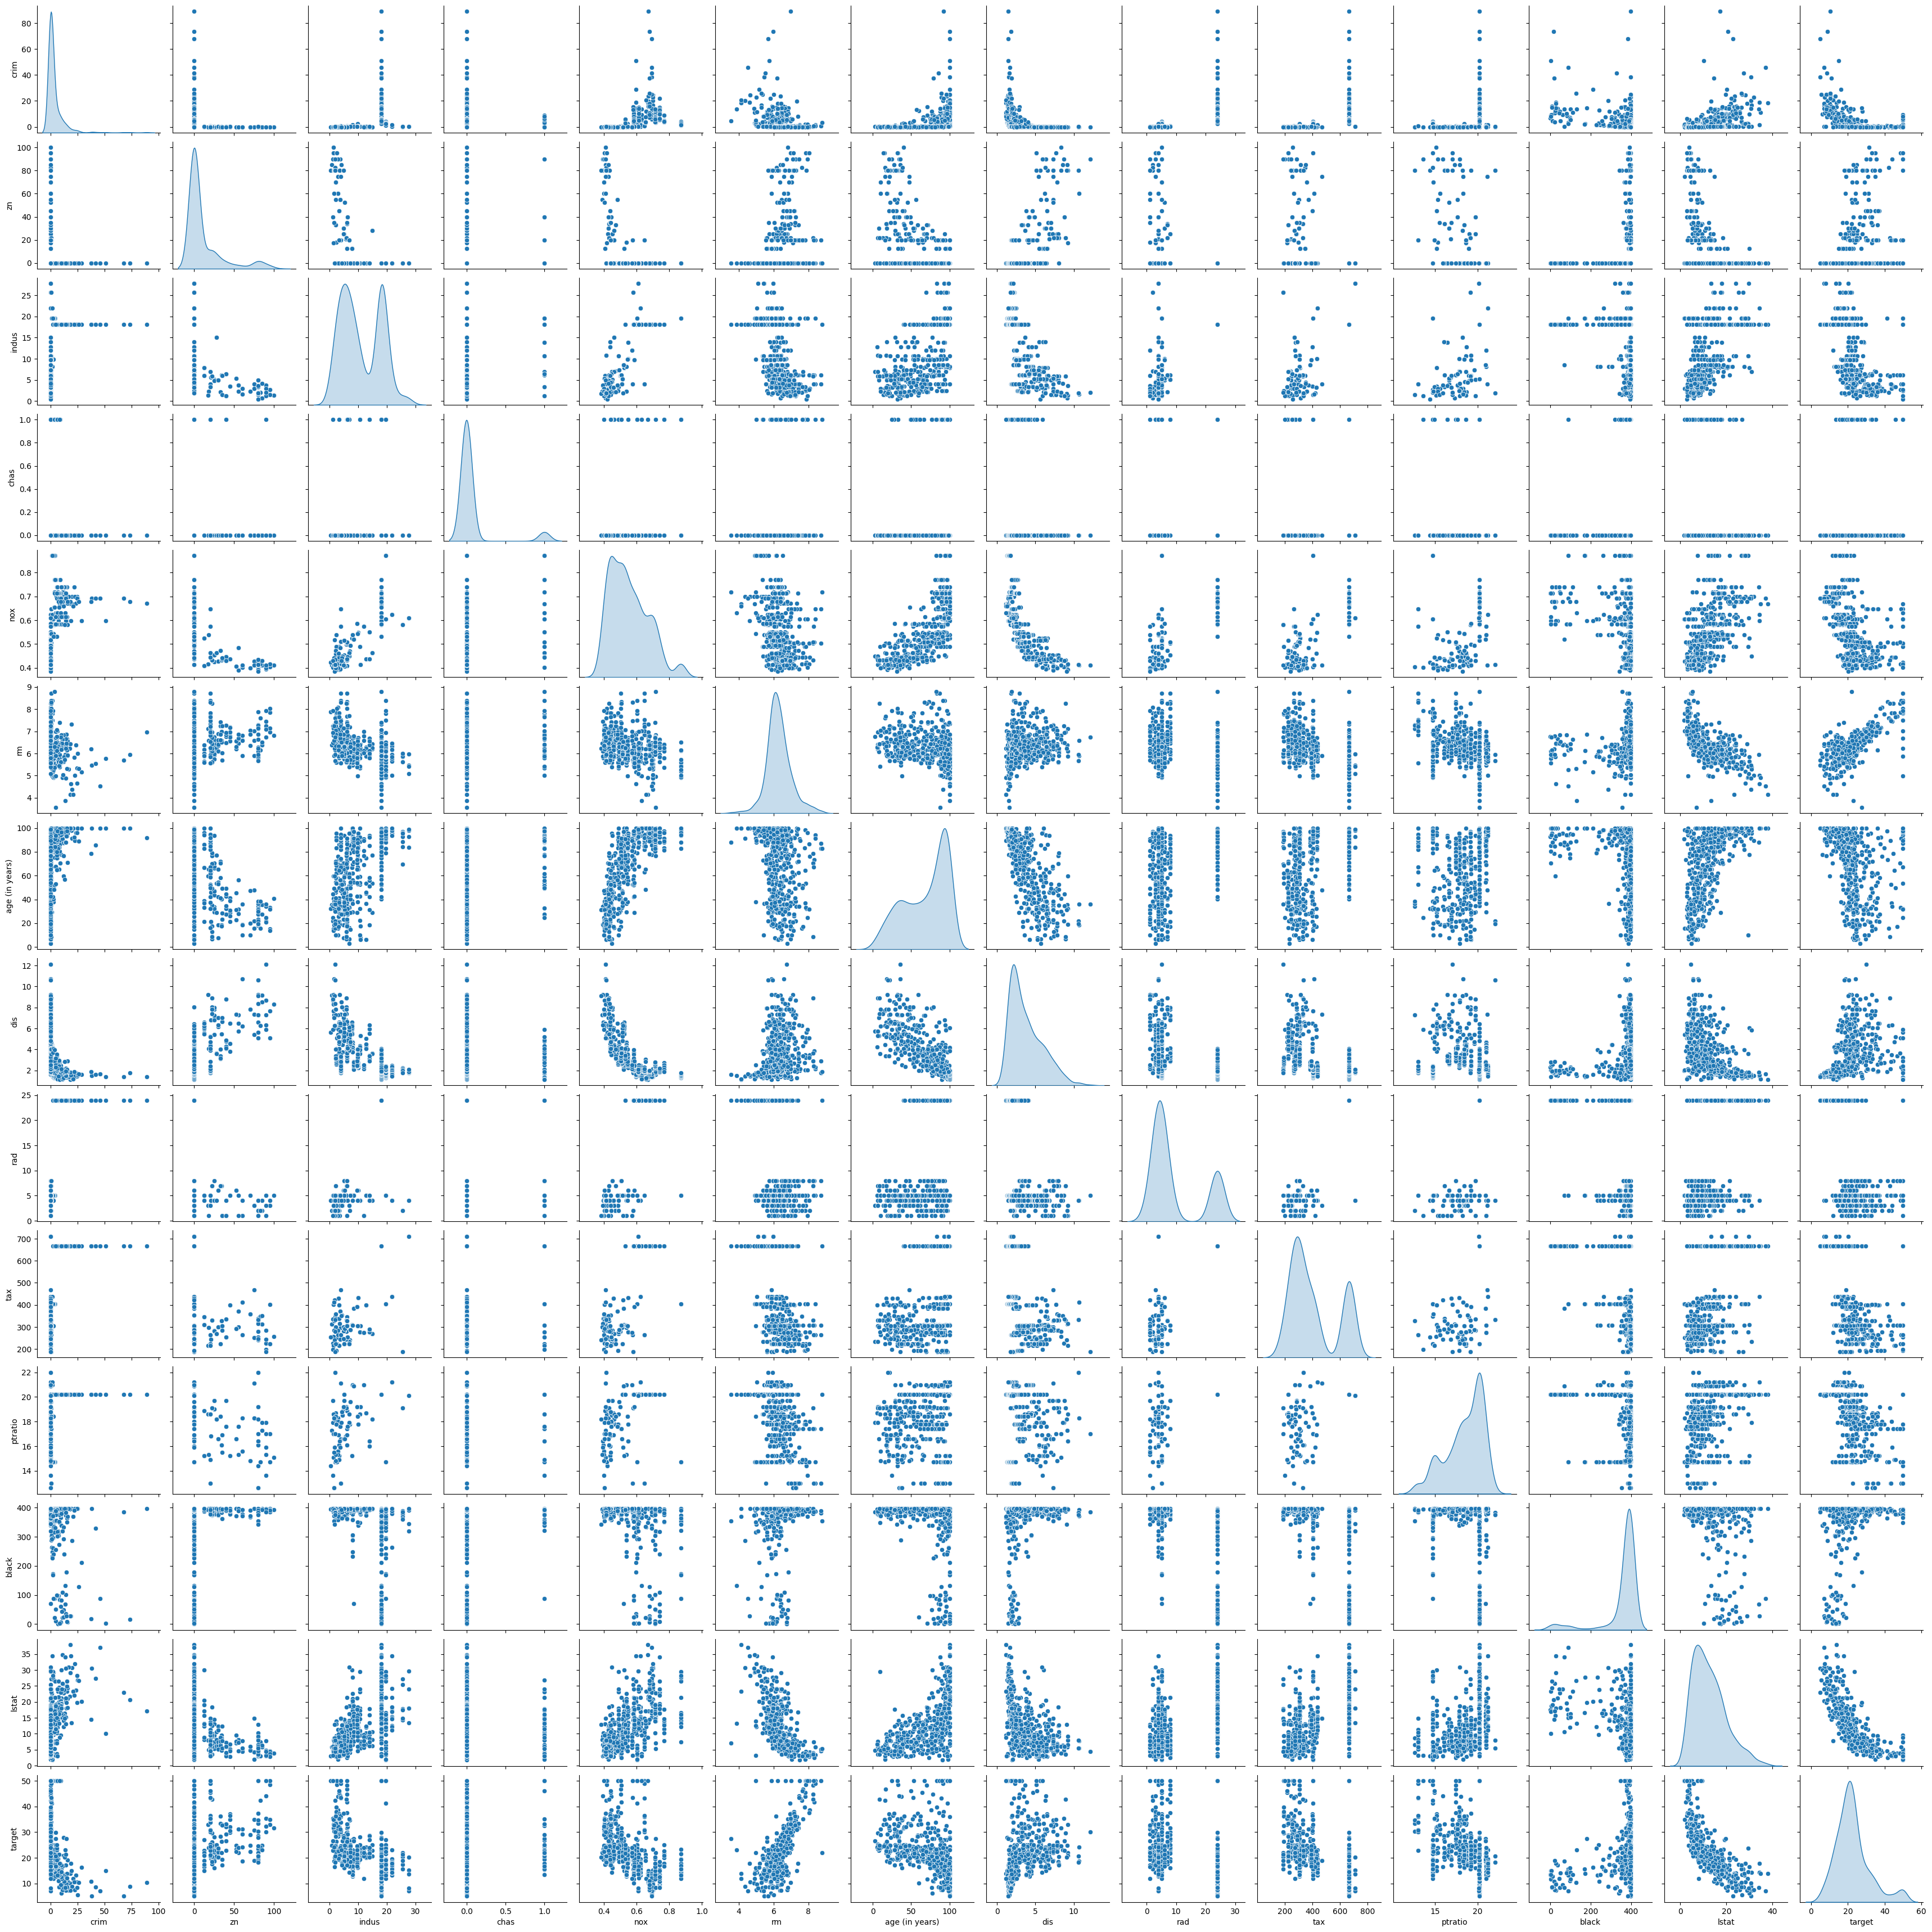

In [40]:
#Pairplot to visualize features and their relationships
sns.pairplot(boston_housing_data, diag_kind="kde")

#### 3. Creating a Pipeline for Linear Regression

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [77]:
X_train, X_test, y_train, y_test = train_test_split(boston_housing_data.drop('medv', axis=1), boston_housing_data['medv'], test_size=0.2, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [75]:
linear_regression_pipeline = Pipeline(
    [('scaler', StandardScaler()),
    ('model',LinearRegression())]
)

linear_regression_pipeline.fit(X_train, y_train)

y_pred = linear_regression_pipeline.predict(X_test)

r2 = r2_score(y_test,y_pred)

print("R-Squared score: ",r2)


R-Squared score:  0.6687594935356321


In [82]:
ridge_regression_pipeline = Pipeline(
    [('scaler', StandardScaler()),
    ('model',Ridge(alpha=1.0))]
)

ridge_regression_pipeline.fit(X_train, y_train)

y_pred = ridge_regression_pipeline.predict(X_test)

r2 = r2_score(y_test,y_pred)

print("R-Squared score: ",r2)

R-Squared score:  0.6684624359643558


In [ ]:
random_forest_regression_pipeline = Pipeline([
    ('model',RandomForestRegressor(random_state=42))     
])

random_forest_regression_pipeline.fit(X_train, y_train)

y_pred = random_forest_regression_pipeline.predict(X_test)

r2 = r2_score(y_test,y_pred)

print("R-Squared score: ",r2)